In [40]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

In [4]:
# Filter for Country and Skills
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [14]:
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

df_DA_IND_exploded = df_DA_Ind.explode('job_skills')

df_DA_IND_exploded[['salary_year_avg', 'job_skills']].head(5)



,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [18]:
df_DA_skills = df_DA_IND_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})
DA_job_count = len(df_DA_IND)
df_DA_skills['Skills_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5 
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['Skills_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,Skills_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


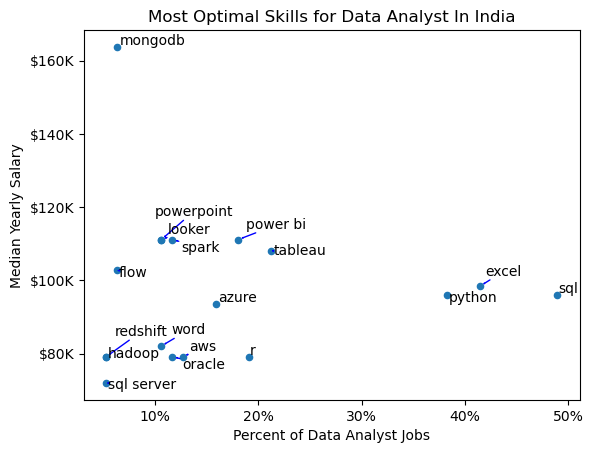

In [32]:
from adjustText import adjust_text
df_DA_skills_high_demand.plot(kind='scatter',x='Skills_percent',y='median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f"${int(y/1000)}K"))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst In India')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['Skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->",color='b',lw=1))

plt.tight_layout
plt.show()

In [34]:
df_tech = df['job_type_skills'].copy()

# Removing duplicates
df_tech = df_tech.drop_duplicates()

# Removing NaN Values
df_tech = df_tech.dropna()

tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row) # Convert string to dcitionary
    for key , value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value # if key already exists in tech dict, then add value to the existing value
        else:
            tech_dict[key] = value # if key doesn't exist in tech dict, then add value and key

# removing duplicates by converting values to set them back to a list
for key , value in tech_dict.items():
    tech_dict[key] = list(set(value))   
tech_dict          

{'analyst_tools': ['alteryx',
  'sas',
  'visio',
  'microstrategy',
  'sharepoint',
  'spreadsheet',
  'esquisse',
  'msaccess',
  'ssis',
  'datarobot',
  'sheets',
  'powerbi',
  'cognos',
  'word',
  'splunk',
  'powerpoint',
  'ms access',
  'qlik',
  'power bi',
  'nuix',
  'tableau',
  'outlook',
  'excel',
  'dax',
  'spss',
  'ssrs',
  'sap',
  'looker'],
 'programming': ['julia',
  'sass',
  'swift',
  'scala',
  'mongo',
  'sas',
  'perl',
  'clojure',
  'c#',
  'visual basic',
  'delphi',
  'matlab',
  't-sql',
  'shell',
  'typescript',
  'haskell',
  'php',
  'elixir',
  'ruby',
  'sql',
  'bash',
  'ocaml',
  'c',
  'solidity',
  'groovy',
  'vba',
  'assembly',
  'rust',
  'html',
  'objective-c',
  'kotlin',
  'c++',
  'css',
  'vb.net',
  'pascal',
  'nosql',
  'lua',
  'dart',
  'python',
  'golang',
  'lisp',
  'cobol',
  'r',
  'javascript',
  'go',
  'java',
  'crystal',
  'apl',
  'erlang',
  'fortran',
  'visualbasic',
  'mongodb',
  'f#',
  'no-sql',
  'powersh

In [42]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns= ['technology', 'skills'])
df_tech = df_tech.explode('skills')

df_plot = df_DA_skills_high_demand.merge(df_tech, left_on='job_skills', right_on='skills')


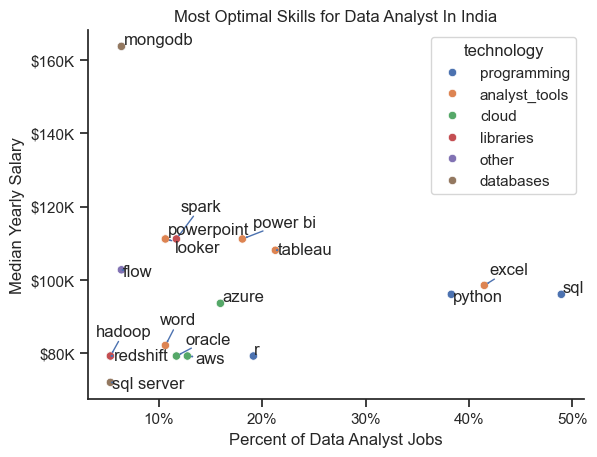

In [46]:
from adjustText import adjust_text
# df_DA_skills_high_demand.plot(kind='scatter',x='Skills_percent',y='median_salary')
sns.scatterplot(
    data = df_plot,
    x = 'Skills_percent',
    y = 'median_salary',
    hue = 'technology'
)

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f"${int(y/1000)}K"))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst In India')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['Skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->",color='b',lw=1))

plt.tight_layout
plt.show()